In [1]:
import pandas as pd
import numpy as np

#### Importing the dataset

In [3]:
df=pd.read_csv('Selected_Features.csv')

In [4]:
df.head()

,amt,city_pop,trans_month,Weekday,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,...,Frequency_1DAY_WINDOW,Monetary_1DAY_WINDOW,Monetary_7DAY_WINDOW,merchant_NB_TX_1DAY_WINDOW,merchant_RISK_1DAY_WINDOW,merchant_RISK_7DAY_WINDOW,category_NB_TX_1DAY_WINDOW,category_RISK_1DAY_WINDOW,distance,is_fraud
0,135.04,6284,7,0,0,0,0,0,0,0,...,3.0,46.383333,55.798261,1.0,0.0,0.0,1.0,0.0,7.539311,0
1,68.91,1453,2,1,0,0,0,0,0,0,...,5.0,104.600000,160.646471,1.0,0.0,0.0,1.0,0.0,93.086434,0
2,47.97,224256,5,0,0,0,0,0,0,0,...,6.0,127.248333,78.534688,1.0,0.0,0.0,1.0,0.0,128.012419,0
3,18.66,1304,4,0,0,0,0,0,0,0,...,2.0,11.215000,29.892000,1.0,0.0,0.0,1.0,0.0,134.944352,0
4,727.56,737,3,1,0,0,0,0,0,0,...,6.0,513.525000,305.419412,1.0,0.0,0.0,1.0,0.0,81.109957,1


In [5]:
df['is_fraud'].value_counts()

is_fraud
0    1031400
1    1030817
Name: count, dtype: int64

In [6]:
df.shape

(2062217, 27)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062217 entries, 0 to 2062216
Data columns (total 27 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   amt                         float64
 1   city_pop                    int64  
 2   trans_month                 int64  
 3   Weekday                     int64  
 4   category_food_dining        int64  
 5   category_gas_transport      int64  
 6   category_grocery_net        int64  
 7   category_grocery_pos        int64  
 8   category_health_fitness     int64  
 9   category_home               int64  
 10  category_kids_pets          int64  
 11  category_misc_net           int64  
 12  category_misc_pos           int64  
 13  category_personal_care      int64  
 14  category_shopping_net       int64  
 15  category_shopping_pos       int64  
 16  category_travel             int64  
 17  Frequency_1DAY_WINDOW       float64
 18  Monetary_1DAY_WINDOW        float64
 19  Monetary_7DAY_WINDOW 

#### Dependent & Independent Variable

In [8]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

#### Splitting Data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Converting Dependent variable in format suitable for LSTM

In [10]:
features = np.array(x_train)
features.shape

(1649773, 26)

In [11]:
features = features.reshape(features.shape[0],1, features.shape[1])
features.shape

(1649773, 1, 26)

In [12]:
features

array([[[1.10300000e+01, 1.45000000e+02, 4.00000000e+00, ...,
         1.00000000e+00, 0.00000000e+00, 6.91295594e+01]],

       [[3.46200000e+01, 6.12000000e+03, 5.00000000e+00, ...,
         1.00000000e+00, 0.00000000e+00, 1.03908372e+02]],

       [[1.06450000e+02, 1.53600000e+03, 6.00000000e+00, ...,
         1.00000000e+00, 0.00000000e+00, 3.86624896e+01]],

       ...,

       [[5.86000000e+01, 5.21600000e+03, 1.10000000e+01, ...,
         1.00000000e+00, 0.00000000e+00, 8.69745746e+01]],

       [[1.39200000e+01, 5.97050000e+04, 1.20000000e+01, ...,
         1.00000000e+00, 0.00000000e+00, 1.04640840e+02]],

       [[2.49000000e+00, 1.84080000e+04, 1.00000000e+01, ...,
         1.00000000e+00, 0.00000000e+00, 6.51432462e+01]]])

In [13]:
target = np.array(y_train)
target.shape

(1649773, 1)

In [45]:
target

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

#### LSTM MODEL ARCHITECTURE

An LSTM (Long Short-Term Memory) is an advanced type of recurrent neural network architecture that is designed to capture and remember long-term dependencies in sequential data. It consists of three main components:
cell state, input gate, forget gate

In [15]:
import tensorflow as tf
import random

2023-06-18 19:54:07.862972: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
norm = tf.keras.layers.Normalization(axis= -1,input_shape=(1, features.shape[2]))
norm.adapt(features)

In [17]:
model = tf.keras.Sequential([
    norm,
    tf.keras.layers.LSTM(128, return_sequences = True),
    tf.keras.layers.LSTM(128, return_sequences = True),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

2023-06-18 19:54:50.882773: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-18 19:54:50.884650: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-18 19:54:50.886414: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [18]:
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001), loss= "mae")

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 1, 26)            53        
 n)                                                              
                                                                 
 lstm (LSTM)                 (None, 1, 128)            79360     
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            131584    
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 1

##### The tf.keras.Sequential function is used to create a sequential model, which is a linear stack of layers. The model architecture is defined as follows:

 * Normalization Layer: The normalization layer  is added as the first layer in the model. It normalizes the input data before passing it to the subsequent layers.

 * LSTM Layers:  Two LSTM (Long Short-Term Memory) layers are added to the model. These LSTM layers are designed to capture temporal dependencies and patterns in sequential data.

* GlobalAveragePooling1D Layer: A tf.keras.layers.GlobalAveragePooling1D layer is added after the LSTM layers. It performs average pooling across the time dimension of the input sequences, resulting in a fixed-length output representation.

 * Dropout Layer: A tf.keras.layers.Dropout layer with a dropout rate of 0.5 is inserted after the global average pooling layer. Dropout is a regularization technique that randomly drops out a fraction of the input units during training, helping to prevent overfitting.

 * Dense Layer: The final layer is a tf.keras.layers.Dense layer with a single unit and sigmoid activation. This layer produces a single prediction output, which is suitable for binary classification tasks.

Model Compilation: The model.compile function is used to configure the training process of the model. The optimizer is set to tf.optimizers.Adam with a learning rate of 0.001.

#### Fitting the Model

In [20]:
history = model.fit(features, target, validation_split = 0.2, epochs = 30, batch_size = 64,
                callbacks = [tf.keras.callbacks.EarlyStopping(patience = 7, 
                                                              monitor = 'val_loss', 
                                                              mode = 'min', 
                                                              restore_best_weights=True)])

Epoch 1/30


2023-06-18 19:54:51.725510: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-18 19:54:51.727428: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-18 19:54:51.729273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

20623/20623 [==============================] - ETA: 0s - loss: 0.0260

2023-06-18 19:56:16.369323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-18 19:56:16.371051: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-18 19:56:16.372731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

20623/20623 [==============================] - 93s 4ms/step - loss: 0.0260 - val_loss: 0.0220
Epoch 2/30
20623/20623 [==============================] - 90s 4ms/step - loss: 0.0215 - val_loss: 0.0198
Epoch 3/30
20623/20623 [==============================] - 88s 4ms/step - loss: 0.0190 - val_loss: 0.0180
Epoch 4/30
20623/20623 [==============================] - 88s 4ms/step - loss: 0.0176 - val_loss: 0.0164
Epoch 5/30
20623/20623 [==============================] - 88s 4ms/step - loss: 0.0170 - val_loss: 0.0186
Epoch 6/30
20623/20623 [==============================] - 88s 4ms/step - loss: 0.0166 - val_loss: 0.0157
Epoch 7/30
20623/20623 [==============================] - 88s 4ms/step - loss: 0.0163 - val_loss: 0.0166
Epoch 8/30
20623/20623 [==============================] - 88s 4ms/step - loss: 0.0160 - val_loss: 0.0157
Epoch 9/30
20623/20623 [==============================] - 88s 4ms/step - loss: 0.0158 - val_loss: 0.0160
Epoch 10/30
20623/20623 [==============================] - 96s 5ms

#### LOSS CURVE

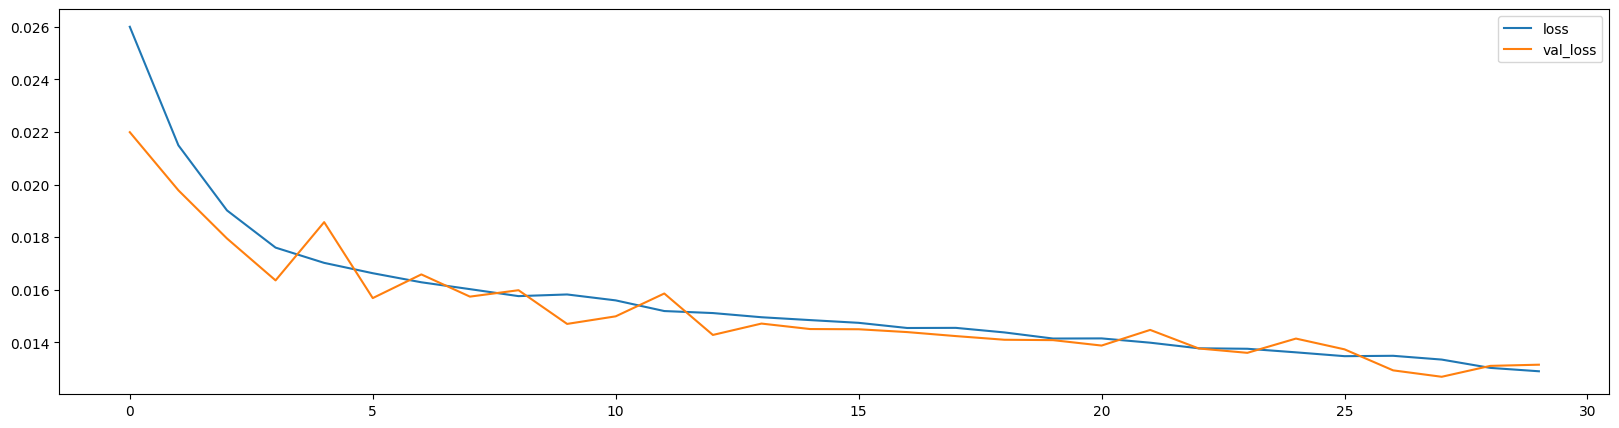

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 5))
plt.plot(history.history['loss'], label = "loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.legend()
plt.show()

### TRAIN PERFORMANCE

In [22]:
y_features=model.predict(features, batch_size = 64)

2023-06-18 20:48:23.172926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-18 20:48:23.175191: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-18 20:48:23.176902: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

25778/25778 [==============================] - 47s 2ms/step


In [23]:
y_features_binary = (y_features > 0.5).astype(int)

#### Evaluation of Performance Metrics

In [24]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(target,y_features_binary)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(target, y_features_binary)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(target, y_features_binary)
print('Recall: %f' % recall)

Accuracy: 0.987115
Precision: 0.989650
Recall: 0.984517


#### In class imbalance problems, Precision and recall are given more importance. Trained  LSTM is showing excellent performance on train dataset.

##### Considering Misclassifications

In [25]:
def create_table(target, y_pred,weights):
    target = np.reshape(target, -1)
    y_pred = np.reshape(y_pred, -1)
    weights=np.reshape(weights,-1)
    return pd.DataFrame({"actual values": target,
                         "weights":weights,
                         "predict values": y_pred,
                         "diff": np.abs(target - y_pred)})

In [26]:
df_pred=create_table(target, y_features_binary,y_features)

In [27]:
df_pred[df_pred['diff'] == 1]

,actual values,weights,predict values,diff
50,1,4.916738e-12,0,1
66,1,2.775680e-25,0,1
224,1,7.452698e-10,0,1
356,1,4.248459e-22,0,1
368,1,1.014307e-16,0,1
...,...,...,...,...
1649515,1,5.320709e-02,0,1
1649549,1,8.065366e-35,0,1
1649595,0,9.999996e-01,1,1
1649631,0,1.000000e+00,1,1


#### Classification Report

In [28]:
from sklearn.metrics import classification_report
print(classification_report(target, y_features_binary))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    825170
           1       0.99      0.98      0.99    824603

    accuracy                           0.99   1649773
   macro avg       0.99      0.99      0.99   1649773
weighted avg       0.99      0.99      0.99   1649773



###### Precision-Recall Curve 
* The precision-recall curve is an essential evaluation metric in credit card fraud detection due to its ability to handle imbalanced data, focus on fraud cases, capture the precision-recall trade-off, aid decision threshold selection, enable model comparison, and provide a comprehensive assessment of model performance.

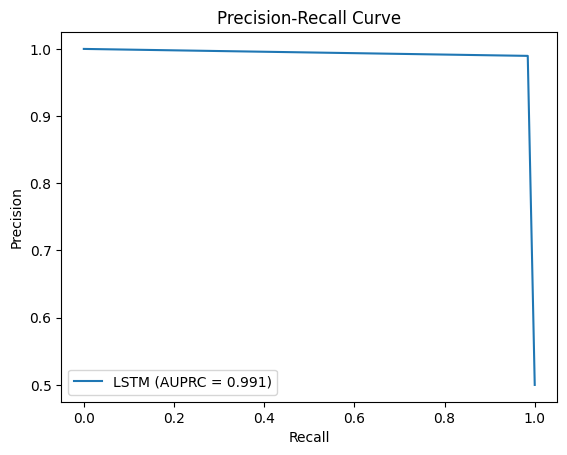

In [29]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(target, y_features_binary)
auprc = auc(recall, precision)
plt.plot(recall, precision, label='LSTM (AUPRC = {:.3f})'.format(auprc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

### TEST PERFORMANCE

In [30]:
x_test=np.array(x_test)

In [31]:
x_test_reshaped=x_test.reshape(x_test.shape[0],1, x_test.shape[1])

In [32]:
y_test = np.array(y_test)
y_test.shape

(412444, 1)

In [33]:
y_pred = model.predict(x_test_reshaped, batch_size = 64)

6445/6445 [==============================] - 9s 1ms/step


In [34]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [35]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred_binary)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred_binary)
print('Recall: %f' % recall)

Accuracy: 0.986742
Precision: 0.989262
Recall: 0.984167


#### In class imbalance problems, Precision and recall are given more importance. Trained LSTM is showing excellent performance on test (unseen) dataset , thus indicating it has learned patterns of fraud quite well .

#### Considering Misclassifications

In [36]:
df_pred_test=create_table(y_test, y_pred_binary,y_pred)

In [37]:
df_pred_test[df_pred_test['diff'] == 1]

,actual values,weights,predict values,diff
42,0,1.000000e+00,1,1
44,0,9.919722e-01,1,1
152,0,9.547611e-01,1,1
224,1,6.281315e-07,0,1
279,0,1.000000e+00,1,1
...,...,...,...,...
412098,0,1.000000e+00,1,1
412116,1,5.795917e-02,0,1
412195,0,1.000000e+00,1,1
412305,1,2.474828e-09,0,1


In [38]:
confusion_matrix(y_test, y_pred_binary)

array([[204027,   2203],
       [  3265, 202949]])

#### Classification Report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    206230
           1       0.99      0.98      0.99    206214

    accuracy                           0.99    412444
   macro avg       0.99      0.99      0.99    412444
weighted avg       0.99      0.99      0.99    412444



In [40]:
def draw_result(start, end, target, y_pred_binary):
    plt.figure(figsize = (20, 7))
    plt.plot(np.reshape(target[start:end], -1), linewidth=5, label = "actual values")
    plt.plot(np.reshape(y_pred_binary[start:end], -1), linewidth=2, label = "predicted values")
    plt.legend()

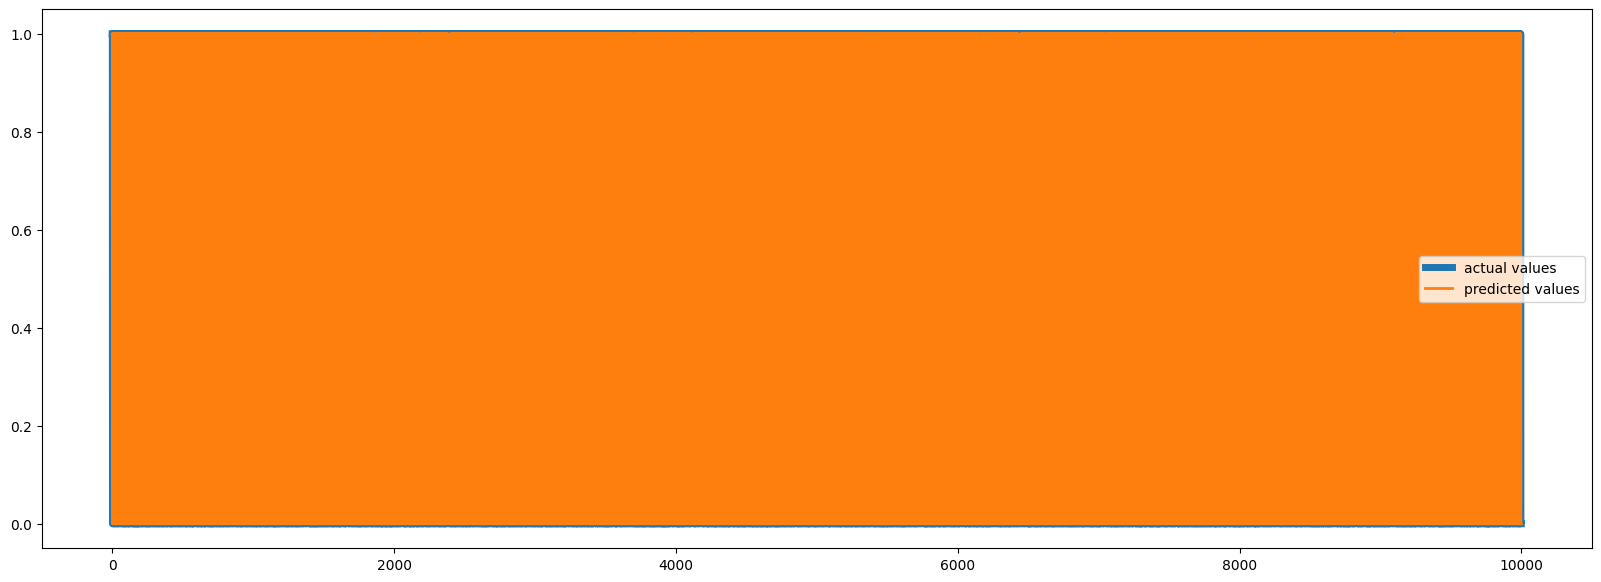

In [41]:
draw_result(20000,30000, y_test, y_pred_binary)

##### Precision-Recall Curve
* The precision-recall curve is an essential evaluation metric in credit card fraud detection due to its ability to handle imbalanced data, focus on fraud cases, capture the precision-recall trade-off, aid decision threshold selection, enable model comparison, and provide a comprehensive assessment of model performance.

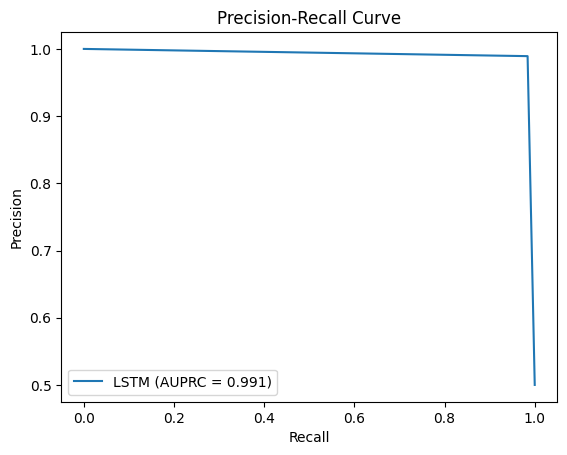

In [42]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_binary)
auprc = auc(recall, precision)
plt.plot(recall, precision, label='LSTM (AUPRC = {:.3f})'.format(auprc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

##### Saving the model  for combined Predictions

In [44]:
model.save('LSTM_model.h5')